# Lending Club Group Study

For company like Lending Club there are two ways in which the company can make a loss. 

1. Not lending money to a borrower who would repay the loan.
2. Lending money ot a borrower who will not repay the loan.

The main cause of loss for the company Lending Club turns out to be issuing loans to borrowers who will not repay the loan(ie. they will default). In this exploratory data analysis, we will try to find out the characteristics which will help to identify the risky borrowers who are most likely to default. Thus through this annalysis we will try to mitigate the risk of losing money for Lending Club

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
loan = pd.read_csv("data\\loan.csv", encoding = "ISO-8859-1", low_memory = False)

Setting proper parameters in the read_csv function to overide Python default low_memory handle. 

In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data Understanding

We observe 3 diferent types of variables in the data as:

1. Applicant demographics
2. Loan characteristics
3. Customer behaviour

As all the exploration is being done before the loan has been issued to the applicant, we will concentrate only on the applicant demographics and the loan characteristics for this data exploration.

In [4]:
loan = loan.loc[:,['id', 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'annual_inc_joint','application_type', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti', 'dti_joint', 'verification_status_joint']]

In [5]:
loan.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,annual_inc_joint,application_type,verification_status,issue_d,loan_status,purpose,dti,dti_joint,verification_status_joint
0,1077501,5000,36 months,10.65%,B,B2,10+ years,RENT,24000.0,NaN,INDIVIDUAL,Verified,Dec-11,Fully Paid,credit_card,27.65,NaN,NaN
1,1077430,2500,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,NaN,INDIVIDUAL,Source Verified,Dec-11,Charged Off,car,1.00,NaN,NaN
2,1077175,2400,36 months,15.96%,C,C5,10+ years,RENT,12252.0,NaN,INDIVIDUAL,Not Verified,Dec-11,Fully Paid,small_business,8.72,NaN,NaN
3,1076863,10000,36 months,13.49%,C,C1,10+ years,RENT,49200.0,NaN,INDIVIDUAL,Source Verified,Dec-11,Fully Paid,other,20.00,NaN,NaN
4,1075358,3000,60 months,12.69%,B,B5,1 year,RENT,80000.0,NaN,INDIVIDUAL,Source Verified,Dec-11,Current,other,17.94,NaN,NaN


In [6]:
loan.shape

(39717, 18)

Now we have reduced the seemingly huge dataset of 111 columns to a manageable 18 columns which will be requiring in this analysis.

In [7]:
loan.isnull().sum()

id                               0
loan_amnt                        0
term                             0
int_rate                         0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
annual_inc_joint             39717
application_type                 0
verification_status              0
issue_d                          0
loan_status                      0
purpose                          0
dti                              0
dti_joint                    39717
verification_status_joint    39717
dtype: int64

The columns **annual_inc_joint, dti_joint and verification_status_joint** have 100% null values. This indicates there is no data related to joint applications. Hence we can drop these columns. Also along with these columns we can go ahead and drop **application_type** as well as at this point it is clear we will only be dealing with single applicants.

In [8]:
loan = loan.drop(columns = ['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'application_type'])

In [9]:
loan.shape

(39717, 14)

In [10]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 14 columns):
id                     39717 non-null int64
loan_amnt              39717 non-null int64
term                   39717 non-null object
int_rate               39717 non-null object
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
annual_inc             39717 non-null float64
verification_status    39717 non-null object
issue_d                39717 non-null object
loan_status            39717 non-null object
purpose                39717 non-null object
dti                    39717 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 4.2+ MB


### Data Cleaning

The column containing interest rates of loans is not in integer which will be problematic to deal with when applying arithmetic operations. Hence we extract the integer value from it and convert it to an integer type. 

In [11]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x.split('%')[0]))

In [12]:
loan

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti
0,1077501,5000,36 months,10.65,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,27.65
1,1077430,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,1.00
2,1077175,2400,36 months,15.96,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,8.72
3,1076863,10000,36 months,13.49,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,20.00
4,1075358,3000,60 months,12.69,B,B5,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,17.94
5,1075269,5000,36 months,7.90,A,A4,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,11.20
6,1069639,7000,60 months,15.96,C,C5,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,23.51
7,1072053,3000,36 months,18.64,E,E1,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,car,5.35
8,1071795,5600,60 months,21.28,F,F2,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,small_business,5.55
9,1071570,5375,60 months,12.69,B,B5,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,other,18.08


**emp_length** column has about 3% n/a values. We can assume that these people were are self-employed and arrange the data accordingly. 

In [13]:
loan.emp_length.fillna("Self-Employed", inplace = True)

In [14]:
loan.shape

(39717, 14)

In [15]:
loan.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti
0,1077501,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65
1,1077430,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00
2,1077175,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72
3,1076863,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00
4,1075358,3000,60 months,12.69,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94


Derived variable **issue_month** is extarcted from the date column.

In [16]:
loan.loc[:,'issue_month'] = loan.issue_d.str.split('-').str[0]

In [17]:
loan.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,issue_month
0,1077501,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Dec
1,1077430,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Dec
2,1077175,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Dec
3,1076863,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Dec
4,1075358,3000,60 months,12.69,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Dec


As we need to primarily deal with the deafaulters, we will be choosing **loan_status** as our **target valiable**.
Since the entire analysis is aimed at finding out the risky borrowers, we will study the data of the borrowers who defaulted and paid off there loan in due time only. We will exclude the Current status borrowers as their final state is not known yet. 

In [18]:
loan = loan.loc[~(loan["loan_status"] == "Current")]

In [19]:
loan['loan_status'] = loan['loan_status'].apply(lambda x: 1 if x == "Charged Off" else 0)

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
loan.annual_inc.describe([0.25,0.5,0.75,0.9])

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
90%      1.150000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

For analysis the continuous variables like annual_inc, loan_amnt etc. we use binning so that we are able to categorise them in groups. The number of bins and the bin edges will be decided depending on the quartile analysis of that particular variable 

In [21]:
loan.loc[:,'annual_inc_category'] = pd.qcut(loan.annual_inc, [0, 0.25, 0.5, 0.75, 0.95, 1], ['low', 'medium', 'high', 'very high', 'outlier'])

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
loan.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,issue_month,annual_inc_category
0,1077501,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,0,credit_card,27.65,Dec,low
1,1077430,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,car,1.00,Dec,low
2,1077175,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,0,small_business,8.72,Dec,low
3,1076863,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,0,other,20.00,Dec,medium
5,1075269,5000,36 months,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,0,wedding,11.20,Dec,low


In [23]:
bins = [0,5000,15000,35000]

In [24]:
loan.loc[:,'loan_amnt_category'] = pd.cut(loan.loan_amnt, bins, labels = ["low", "medium", "high"])

In [25]:
loan.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,issue_month,annual_inc_category,loan_amnt_category
0,1077501,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,0,credit_card,27.65,Dec,low,low
1,1077430,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,car,1.00,Dec,low,low
2,1077175,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,0,small_business,8.72,Dec,low,low
3,1076863,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,0,other,20.00,Dec,medium,medium
5,1075269,5000,36 months,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,0,wedding,11.20,Dec,low,low


In [26]:
loan.int_rate.describe([.25,.5,.75,.9])

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
90%         16.820000
max         24.400000
Name: int_rate, dtype: float64

In [27]:
bins = [5,10,17,25]

In [28]:
loan.loc[:,'int_rate_category'] = pd.cut(loan.int_rate, bins, labels = ["low", "medium", "high"])

In [29]:
loan.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,issue_month,annual_inc_category,loan_amnt_category,int_rate_category
0,1077501,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,0,credit_card,27.65,Dec,low,low,medium
1,1077430,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,car,1.00,Dec,low,low,medium
2,1077175,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,0,small_business,8.72,Dec,low,low,medium
3,1076863,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,0,other,20.00,Dec,medium,medium,medium
5,1075269,5000,36 months,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,0,wedding,11.20,Dec,low,low,low


In [30]:
loan.dti.describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [31]:
bins = [0,10,20,30]
loan.loc[:,'dti_category'] = pd.cut(loan.dti, bins, labels = ["low", "medium", "high"])

In [32]:
loan.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,issue_month,annual_inc_category,loan_amnt_category,int_rate_category,dti_category
0,1077501,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,0,credit_card,27.65,Dec,low,low,medium,high
1,1077430,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,car,1.00,Dec,low,low,medium,low
2,1077175,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,0,small_business,8.72,Dec,low,low,medium,low
3,1076863,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,0,other,20.00,Dec,medium,medium,medium,medium
5,1075269,5000,36 months,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,0,wedding,11.20,Dec,low,low,low,medium


### Data Analysis

#### Univariate analysis

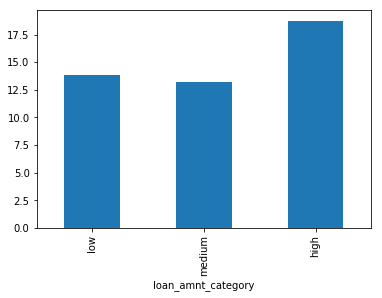

In [33]:
loan_amnt_category_df = loan.groupby(['loan_amnt_category']).loan_status.sum() * 100 / loan.groupby(['loan_amnt_category']).loan_status.count()
loan_amnt_category_df.plot(kind = "bar")

The bar plot for defaulter percentage vs loan_amnt_category shows that the most percentage of defaulters lie in the high loan amount region, ie according to our division above 15000 USD. 
So a person asking for a higher amount of loan is more likely to default than a person asking for a small loan amount. 
Let's see if we can add more value to this trend with the next variable analysis.

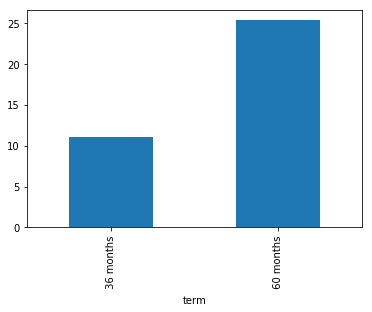

In [34]:
term_df = loan.groupby(['term']).loan_status.sum() * 100 / loan.groupby(['term']).loan_status.count()
term_df.plot(kind = "bar")

Clearly, people opting for a 60 months loan period has a significantly high rate of default.

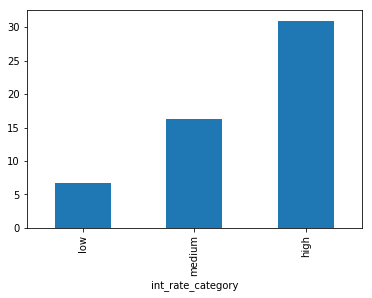

In [35]:
annual_inc_category_df = loan.groupby(['int_rate_category']).loan_status.sum() * 100 / loan.groupby(['int_rate_category']).loan_status.count()
annual_inc_category_df.plot(kind = "bar")

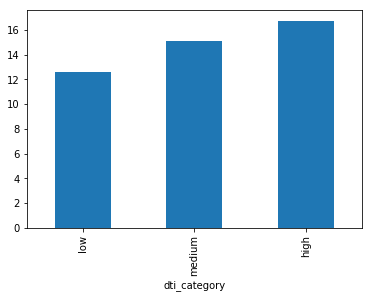

In [36]:
dti_category_df = loan.groupby(['dti_category']).loan_status.sum() * 100 / loan.groupby(['dti_category']).loan_status.count()
dti_category_df.plot(kind = "bar")

For the annual_inc plot we see that the lower the salary scale, the higher is the default rate.
This trend is confirmed by the dti analysis. 

DTI (Debt to Income ratio) is calculated as, DTI = existing debt of the applicant per month/salary per month
Now, as the salary (denominator) is less then even for a fixed numerator for all applicants, the DTI value is larger for people with a low salary scale. 
Now in the DTI plot we see that the people with higher DTI have a higher rate of default, which matches with the defaulter analysis on the basis of annual income.

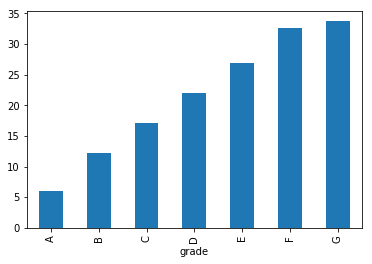

In [37]:
grade_df = loan.groupby(['grade']).loan_status.sum() * 100 / loan.groupby(['grade']).loan_status.count()
grade_df.plot(kind = "bar")

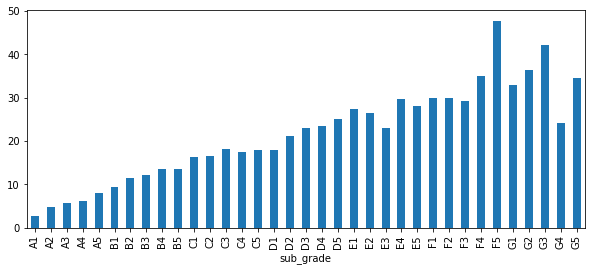

In [38]:
sub_grade_df = loan.groupby(['sub_grade']).loan_status.sum() * 100 / loan.groupby(['sub_grade']).loan_status.count()
sub_grade_df.plot(kind = "bar", figsize=(10,4))

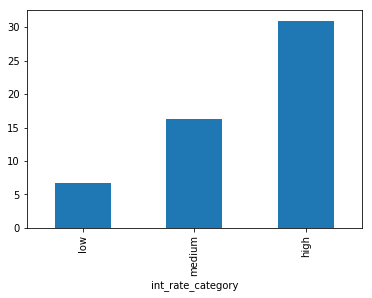

In [39]:
int_rate_category_df = loan.groupby(['int_rate_category']).loan_status.sum() * 100 / loan.groupby(['int_rate_category']).loan_status.count()
int_rate_category_df.plot(kind = "bar")

With a higher rate of interest, > 20 percent, the borrower has resulted in a higher rate of default. 

Now on the base interest rate for lending money, LC attaches a correctionaly value depending on the the grade of the applicant. The grading is done from A to G. A having the highest possibility of paying the loan back while G refering to the loans which have a high chance of default. Hence, as we move from grades A to G, LC increases the rate of interest as the likelihood of recovering the G grade loans is much lessers than other grades. 

However, on doing a subgrade analysis, we understand that the actual highest percentage of defaulters lie in the sub grade F5. 

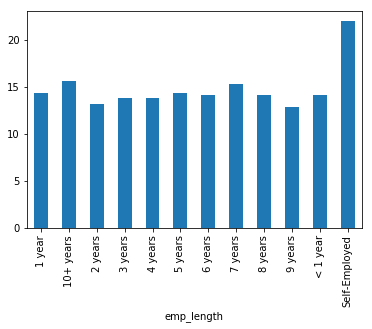

In [40]:
emp_length_df = loan.groupby(['emp_length']).loan_status.sum() * 100 / loan.groupby(['emp_length']).loan_status.count()
emp_length_df.plot(kind = "bar")

Self-employed people seem to default loans significantly more than the rest.

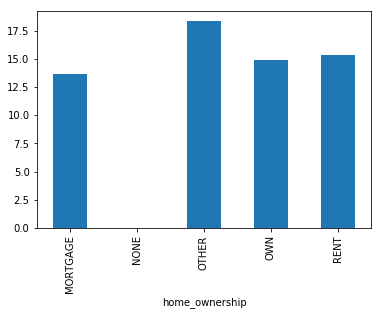

In [41]:
home_ownership_df = loan.groupby(['home_ownership']).loan_status.sum() * 100 / loan.groupby(['home_ownership']).loan_status.count()
home_ownership_df.plot(kind = "bar")

From the above plot we see that people owning a house have a lesser chance of defaulting than people who live in a rented house. However, this difference to is very less to make a call.

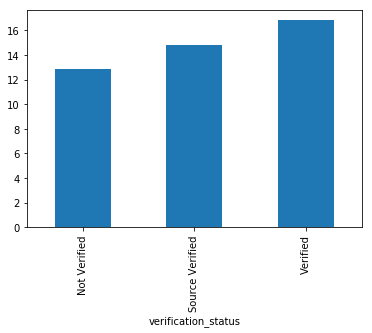

In [42]:
verification_status_df = loan.groupby(['verification_status']).loan_status.sum() * 100 / loan.groupby(['verification_status']).loan_status.count()
verification_status_df.plot(kind = "bar")

Verification status gives us an interesting insight. It shows that there is a higher percentage of defaulters amongst the borrowers whose source of income was verified by a 3rd party source or by LC. 

This can mean any one of the two things:
1. The verification process has some flaws
2. A verified source of income does not help us to concur that a borrower will less likely default and thus has no impact in risky applicant determination

The later point may be considered to be more likely, as a third party source and LC both making error in validation is highly unlikely. 

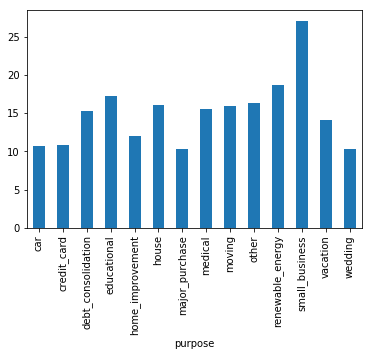

In [43]:
purpose_df = loan.groupby(['purpose']).loan_status.sum() * 100 / loan.groupby(['purpose']).loan_status.count()
purpose_df.plot(kind = "bar")

We see that the highest percentage of defaulters is amongst the borrowers who took loan for small businesses. 

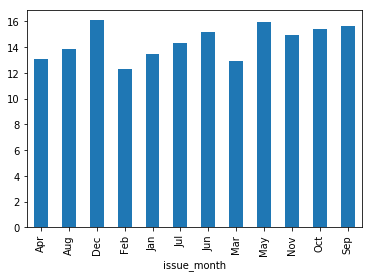

In [44]:
issue_month_df = loan.groupby(['issue_month']).loan_status.sum() * 100 / loan.groupby(['issue_month']).loan_status.count()
issue_month_df.plot(kind = "bar")

#### Bi-variate analysis

When the loan is applied for does not seem to have much effect on whether it will result in a default

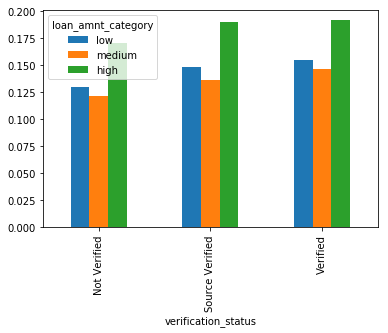

In [45]:
df1 = pd.pivot_table(loan, index = 'verification_status', values = 'loan_status', columns = 'loan_amnt_category', aggfunc = 'sum')
df2 = pd.pivot_table(loan, index = 'verification_status', values = 'loan_status', columns = 'loan_amnt_category', aggfunc = 'count')
df1.div(df2,axis=0).plot.bar()

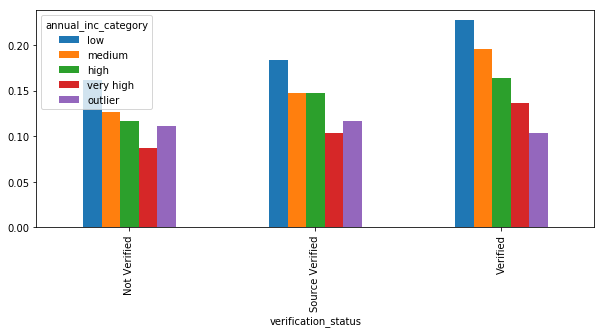

In [46]:
df1 = pd.pivot_table(loan, index = 'verification_status', values = 'loan_status', columns = 'annual_inc_category', aggfunc = 'sum')
df2 = pd.pivot_table(loan, index = 'verification_status', values = 'loan_status', columns = 'annual_inc_category', aggfunc = 'count')
df1.div(df2,axis=0).plot.bar(figsize=(10,4))

The above Bivariate analysis strengthens our claims made in the univariate analysis.

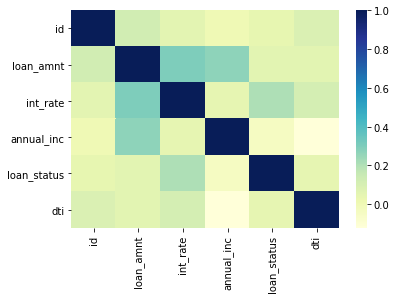

In [47]:
sns.heatmap(loan.corr(), cmap="YlGnBu")

The heatmap above shows the co-relations among the continuous variables. 

### Recommendations

From the above exploratory data analysis we can conclude that the major variables to consider for risky applicant identification are as follows:

1. Employment Length - Self employed individuals are more likely to default. Hence, a proper income validation is required for people without a regular salary.
2. Purpose of Loan - Individuals applying for loan for small businesses are more likely to default. For small businesses, LC should take some form of security such as assets or guarantor to ensure they do not run into a loss. 
3. Grade - Grade showed that the percentage of default increases from grades A to G with a max in grade F5 for the provided data. Keeping this trend in mind LC should try to keep the number of A grades loans more than the number of G grade loans.
4. DTI - The higher the DTI, the higher the chance of default. Hence for people with higher DTI, some form of asset should be taken as mortgage to minimize loss in case of default. 
5. Interest Rate - Higher the interest rate, higher is the default, which is related to the grades assigned as with grades tending towards G we get higher interest rates. So similar to the grade analysis, LC should issue more number of low interest loans than higher interest loans.
6. Term - 60months loans seem to default more than 36months loans. Hence LC should focus on short term loans rather than longer term loans. 